# Segmentation
Visuals used for semantic segmentation and other segmentation tasks.

In [1]:
from IPython.display import display

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from pathlib import Path

### Loading images

In [2]:
rgb_images = sorted(glob.glob('datasets/rellis_images/rgb/*'))
color_labels= sorted(glob.glob('datasets/rellis_images/color_label/*'))
id_labels = sorted(glob.glob('datasets/rellis_images/id_label/*'))

image_type_iterable = [rgb_images, color_labels, id_labels]

## Compare Images Grid

In [3]:
def images_compare_grid(data_per_column = [], rows = 3, cols = 3, plot_size = 4):
    """Compares images of different types in each column
    
    Args:
        data_per_column: An n x m list containing the filepaths for each type of
                         image. Where n = # of images types (columns of the grid)
                         and m = # of images per image type.
    """
    indices = np.random.choice(np.arange(len(data_per_column[0])), rows)
    indices = np.repeat(indices, cols) # repeat indices to align for 3 images

    plt.figure(figsize=(plot_size * cols, plot_size * rows))
    for i in range(rows * cols):
        index = indices[i]
        wrap_index = i % len(image_type_iterable) # index used to wrap around the list
        # this lets you loop through each image type every row
        image_data = mpimg.imread(image_type_iterable[wrap_index][index]) 
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_data, cmap="gray")
        plt.title(Path(image_type_iterable[wrap_index][index]).stem)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace=-0.5)

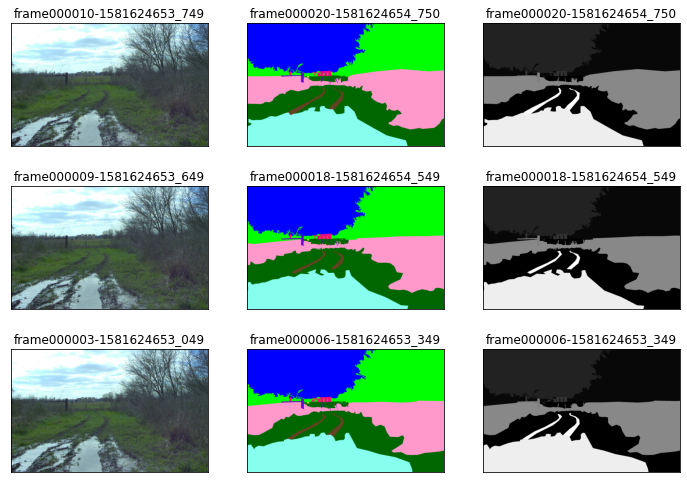

In [4]:
images_compare_grid(image_type_iterable)

In [5]:
 # Taken from rellis github
color_palette = {
    0: {"color": [0, 0, 0],  "name": "void"},
    1: {"color": [108, 64, 20],   "name": "dirt"},
    3: {"color": [0, 102, 0],   "name": "grass"},
    4: {"color": [0, 255, 0],  "name": "tree"},
    5: {"color": [0, 153, 153],  "name": "pole"},
    6: {"color": [0, 128, 255],  "name": "water"},
    7: {"color": [0, 0, 255],  "name": "sky"},
    8: {"color": [255, 255, 0],  "name": "vehicle"},
    9: {"color": [255, 0, 127],  "name": "object"},
    10: {"color": [64, 64, 64],  "name": "asphalt"},
    12: {"color": [255, 0, 0],  "name": "building"},
    15: {"color": [102, 0, 0],  "name": "log"},
    17: {"color": [204, 153, 255],  "name": "person"},
    18: {"color": [102, 0, 204],  "name": "fence"},
    19: {"color": [255, 153, 204],  "name": "bush"},
    23: {"color": [170, 170, 170],  "name": "concrete"},
    27: {"color": [41, 121, 255],  "name": "barrier"},
    31: {"color": [134, 255, 239],  "name": "puddle"},
    33: {"color": [99, 66, 34],  "name": "mud"},
    34: {"color": [110, 22, 138],  "name": "rubble"}
}

## Segmented Image with Labels

In [6]:
def plot_segmented_image(label_array):
    """Plot random label color image with class labels"""
    index = np.random.choice(len(label_array))
    image = mpimg.imread(label_array[index])
    # Convert color palette to list of colors and labels
    colors = [ [value['color'][0] / 255, value['color'][1] / 255, value['color'][2] / 255] 
               for key, value in color_palette.items()]
    labels = [value['name'] for key, value in color_palette.items()]
    
    plt.figure(figsize = (9,9))
    ax = plt.imshow(image)
    plt.title(Path(label_array[index]).stem)
    plt.axis('off')
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i]) ) for i in range(len(labels)) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, ncol=2, 
               handleheight=2, handlelength=1.5, labelspacing=1, fontsize='large')

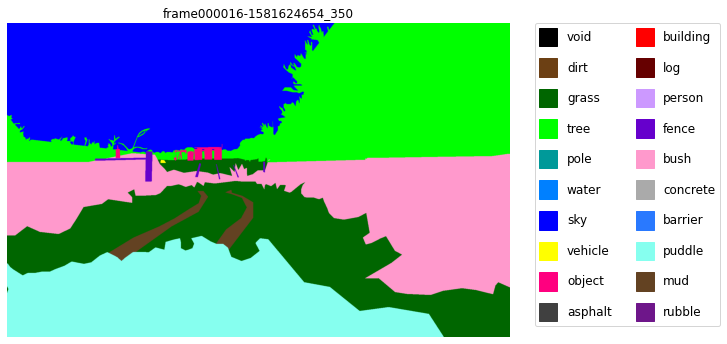

In [7]:
plot_segmented_image(color_labels)